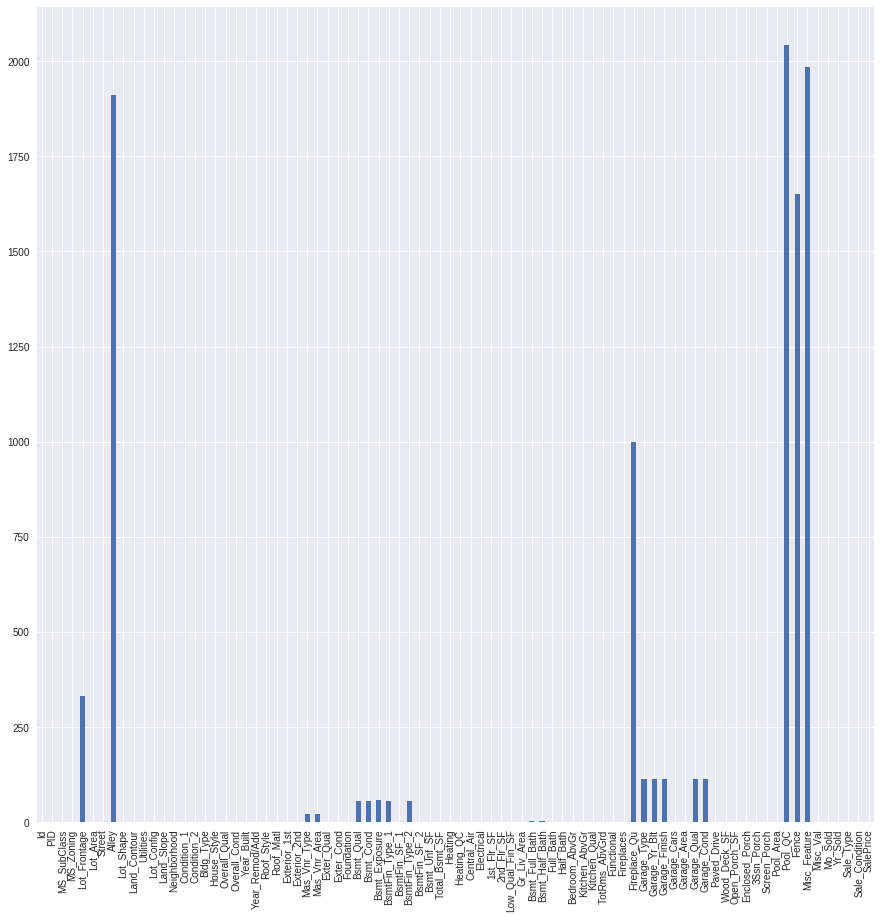

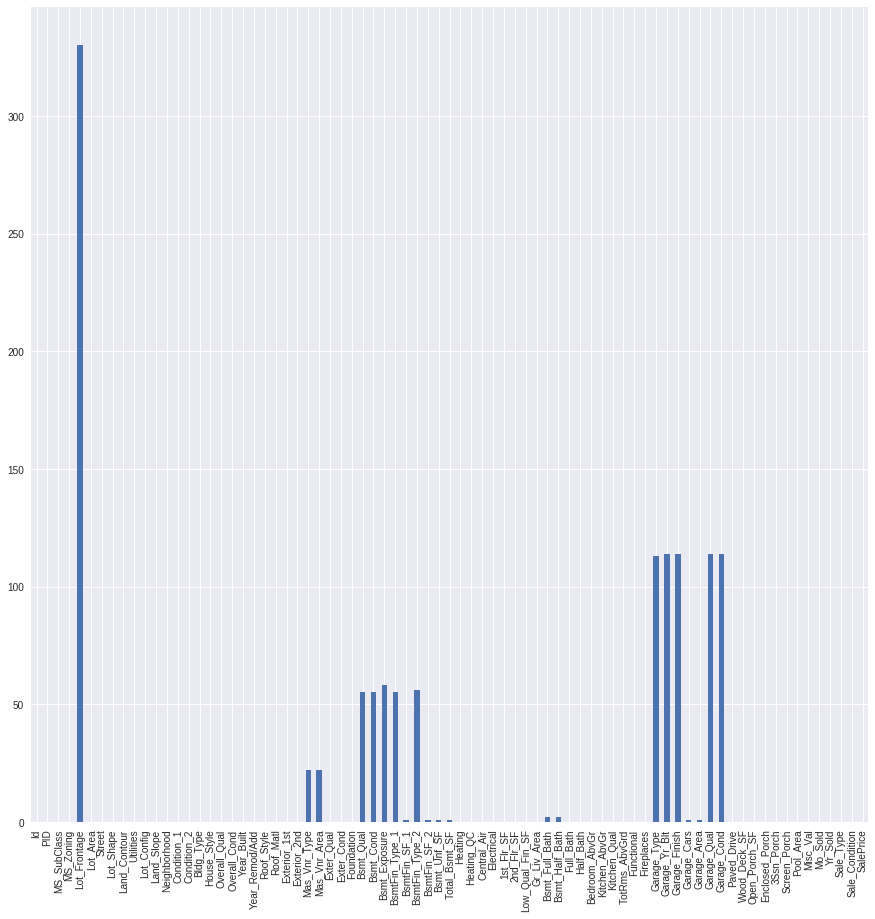

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LassoCV, RidgeCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, FunctionTransformer, Imputer
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

ames_data = pd.read_csv("train.csv")

ames_data.columns = ames_data.columns.map(lambda x: str(x.replace(' ', '_')))

missing_data = ames_data.isnull().sum()

fig, ax = plt.subplots(figsize=(15,15))
missing_data.plot(kind = 'bar')

ames_data = ames_data.drop(["Alley",'Fireplace_Qu','Pool_QC','Fence', 'Misc_Feature'], axis = 1)

missing_data = ames_data.isnull().sum()

fig, ax = plt.subplots(figsize=(15,15))
missing_data.plot(kind = 'bar')

In [28]:
ames_data.isnull().sum()

Id                  0
PID                 0
MS_SubClass         0
MS_Zoning           0
Lot_Frontage      330
Lot_Area            0
Street              0
Lot_Shape           0
Land_Contour        0
Utilities           0
Lot_Config          0
Land_Slope          0
Neighborhood        0
Condition_1         0
Condition_2         0
Bldg_Type           0
House_Style         0
Overall_Qual        0
Overall_Cond        0
Year_Built          0
Year_Remod/Add      0
Roof_Style          0
Roof_Matl           0
Exterior_1st        0
Exterior_2nd        0
Mas_Vnr_Type       22
Mas_Vnr_Area       22
Exter_Qual          0
Exter_Cond          0
Foundation          0
                 ... 
Bsmt_Full_Bath      2
Bsmt_Half_Bath      2
Full_Bath           0
Half_Bath           0
Bedroom_AbvGr       0
Kitchen_AbvGr       0
Kitchen_Qual        0
TotRms_AbvGrd       0
Functional          0
Fireplaces          0
Garage_Type       113
Garage_Yr_Blt     114
Garage_Finish     114
Garage_Cars         1
Garage_Are

In [29]:
null_columns = ames_data.columns[ames_data.isnull().any()]
ames_data[null_columns].isnull().sum()

Lot_Frontage      330
Mas_Vnr_Type       22
Mas_Vnr_Area       22
Bsmt_Qual          55
Bsmt_Cond          55
Bsmt_Exposure      58
BsmtFin_Type_1     55
BsmtFin_SF_1        1
BsmtFin_Type_2     56
BsmtFin_SF_2        1
Bsmt_Unf_SF         1
Total_Bsmt_SF       1
Bsmt_Full_Bath      2
Bsmt_Half_Bath      2
Garage_Type       113
Garage_Yr_Blt     114
Garage_Finish     114
Garage_Cars         1
Garage_Area         1
Garage_Qual       114
Garage_Cond       114
dtype: int64

In [30]:
ames_data["Lot_Frontage"] = ames_data.groupby("Neighborhood")["Lot_Frontage"].transform(lambda x: x.fillna(x.median()))

In [31]:
def string_cleaning(df):
    return df.replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1,'Av': 3, 'Mn': 2, 'No': 1,\
                            'GLQ': 5, 'ALQ': 4, 'BLQ': 3, 'Rec': 4, 'LwQ': 2, 'Unf': 1, 'Typ': 5, 'Min1': 4,\
                            'Min2': 4, 'Mod': 3, 'Maj1': 2, 'Maj2': 2, 'Sal': 0,'Fin': 3, 'RFn': 2, 'Unf': 1,\
                            'AllPub': 1, 'Pave': 1, 'Grvl': 0, 'AllPub': 4, 'NoSewr':3, 'NoSeWa':2, "ELO":1 }, inplace=True)
string_cleaning(ames_data)

string_cleaning_tf = FunctionTransformer(string_cleaning, validate=False)
ames_data.head()

,Id,PID,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Lot_Shape,Land_Contour,Utilities,...,Enclosed_Porch,3Ssn_Porch,Screen_Porch,Pool_Area,Misc_Val,Mo_Sold,Yr_Sold,Sale_Type,Sale_Condition,SalePrice
0,109,533352170,60,RL,70.0,13517,1,IR1,Lvl,4,...,0,0,0,0,0,3,2010,WD,Normal,130500
1,544,531379050,60,RL,43.0,11492,1,IR1,Lvl,4,...,0,0,0,0,0,4,2009,WD,Normal,220000
2,153,535304180,20,RL,68.0,7922,1,Reg,Lvl,4,...,0,0,0,0,0,1,2010,WD,Abnorml,109000
3,318,916386060,60,RL,73.0,9802,1,Reg,Lvl,4,...,0,0,0,0,0,4,2010,WD,Normal,174000
4,255,906425045,50,RL,82.0,14235,1,IR1,Lvl,4,...,0,0,0,0,0,3,2010,WD,Normal,138500


In [32]:
def garage_cleaner(df):
    for col in ('Garage_Yr_Blt', 'Garage_Area', 'Garage_Cars'): 
        df[col] = df[col].fillna(0)
        
garage_cleaner(ames_data)

In [33]:
def no_basement(df):
    for col in ('BsmtFin_SF_1', 'BsmtFin_SF_2', 'Bsmt_Unf_SF','Total_Bsmt_SF', 'Bsmt_Full_Bath', 'Bsmt_Half_Bath'):
        df[col] = df[col].fillna((0))
        
no_basement(ames_data)

In [34]:
ames_data = ames_data.drop(ames_data[(ames_data['Gr_Liv_Area']>4000) & (ames_data['SalePrice']<300000)].index)

Converting all of the string data. 

Getting rid of the null data.

In [35]:
ames_data = ames_data.dropna(axis = 0, how = 'any')

In [36]:
correlation = ames_data.corr()['SalePrice'].sort_values(ascending = False)

# First Gridsearch



In [13]:
y = ames_data["SalePrice"]

features = ['Overall_Qual', 'Exter_Qual','Gr_Liv_Area','Kitchen_Qual','Bsmt_Qual',\
    'Garage_Cars','Garage_Area','1st_Flr_SF','Total_Bsmt_SF','Year_Built','Full_Bath']

X = ames_data[features]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

ss = StandardScaler()

X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

lasso = Lasso()

cross_val_score(lasso, X_train_scaled, y_train).mean() # this is just used to check.

0.845554271570788

In [14]:
params = {
    
    'alpha': np.arange(.6, 1.0, .00001),
    'max_iter': [2000]
}

gs = GridSearchCV(lasso, params)
gs.fit(X_train_scaled, y_train) #this is where knn gets fit to the model.
print(gs.best_params_)
print(gs.best_score_)

{'alpha': 0.99998999999817961, 'max_iter': 2000}
0.845550511717


In [15]:
test = pd.read_csv('test.csv', index_col='Id')
test.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
Id,,,,,,,,,,,,,,,,,,,,,
2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [16]:
test.columns = test.columns.map(lambda x: str(x.replace(' ', '_')))
test = test.drop(["Alley",'Fireplace_Qu','Pool_QC','Fence', 'Misc_Feature'], axis = 1)

In [17]:
test.head()

,PID,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Lot_Shape,Land_Contour,Utilities,Lot_Config,...,Wood_Deck_SF,Open_Porch_SF,Enclosed_Porch,3Ssn_Porch,Screen_Porch,Pool_Area,Misc_Val,Mo_Sold,Yr_Sold,Sale_Type
Id,,,,,,,,,,,,,,,,,,,,,
2658,902301120,190,RM,69.0,9142,Pave,Reg,Lvl,AllPub,Inside,...,0,60,112,0,0,0,0,4,2006,WD
2718,905108090,90,RL,NaN,9662,Pave,IR1,Lvl,AllPub,Inside,...,170,0,0,0,0,0,0,8,2006,WD
2414,528218130,60,RL,58.0,17104,Pave,IR1,Lvl,AllPub,Inside,...,100,24,0,0,0,0,0,9,2006,New
1989,902207150,30,RM,60.0,8520,Pave,Reg,Lvl,AllPub,Inside,...,0,0,184,0,0,0,0,7,2007,WD
625,535105100,20,RL,NaN,9500,Pave,IR1,Lvl,AllPub,Inside,...,0,76,0,0,185,0,0,7,2009,WD


In [18]:
def string_cleaning(df):
    return df.replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1,'Av': 3, 'Mn': 2, 'No': 1,\
                            'GLQ': 5, 'ALQ': 4, 'BLQ': 3, 'Rec': 4, 'LwQ': 2, 'Unf': 1, 'Typ': 5, 'Min1': 4,\
                            'Min2': 4, 'Mod': 3, 'Maj1': 2, 'Maj2': 2, 'Sal': 0,'Fin': 3, 'RFn': 2, 'Unf': 1,\
                            'AllPub': 1, 'Pave': 1, 'Grvl': 0, 'AllPub': 4, 'NoSewr':3, 'NoSeWa':2, "ELO":1 }, inplace=True)
string_cleaning(test)

In [19]:
Xs_test = test[features]
Xs_test.head()
Xs_test.isnull().sum()

Overall_Qual      0
Exter_Qual        0
Gr_Liv_Area       0
Kitchen_Qual      0
Bsmt_Qual        25
Garage_Cars       0
Garage_Area       0
1st_Flr_SF        0
Total_Bsmt_SF     0
Year_Built        0
Full_Bath         0
dtype: int64

In [20]:
median_basement = Xs_test.Bsmt_Qual.median()

Xs_test['Bsmt_Qual'] = Xs_test['Bsmt_Qual'].fillna(median_basement)

In [21]:
Xs_test.isnull().sum()

Overall_Qual     0
Exter_Qual       0
Gr_Liv_Area      0
Kitchen_Qual     0
Bsmt_Qual        0
Garage_Cars      0
Garage_Area      0
1st_Flr_SF       0
Total_Bsmt_SF    0
Year_Built       0
Full_Bath        0
dtype: int64

In [22]:
predictions = gs.predict(Xs_test)

In [23]:
test["SalePrice"] = predictions

test[["SalePrice"]].to_csv('submission_21.csv', index = True)


# Pipeline with Lasso 


In [24]:
y = ames_data["SalePrice"]

features = ['Overall_Qual', 'Exter_Qual','Gr_Liv_Area','Kitchen_Qual','Bsmt_Qual',\
    'Garage_Cars','Garage_Area','1st_Flr_SF','Total_Bsmt_SF','Year_Built','Full_Bath']

X = ames_data[features]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [25]:
X.head()

,Overall_Qual,Exter_Qual,Gr_Liv_Area,Kitchen_Qual,Bsmt_Qual,Garage_Cars,Garage_Area,1st_Flr_SF,Total_Bsmt_SF,Year_Built,Full_Bath
0,6,4,1479,4,3.0,2.0,475.0,725,725.0,1976,2
1,7,4,2122,4,4.0,2.0,559.0,913,913.0,1996,2
2,5,3,1057,4,3.0,1.0,246.0,1057,1057.0,1953,1
3,5,3,1444,3,4.0,2.0,400.0,744,384.0,2006,2
4,6,3,1445,3,2.0,2.0,484.0,831,676.0,1900,2


In [26]:
poly = PolynomialFeatures(include_bias=False)

imputer = Imputer()

ss = StandardScaler()

lasso = Lasso()

pipe = Pipeline([
    
    ('imputer', imputer),
    ('poly', poly),
    ('ss', ss),
    ('lasso', lasso)
]) 

#need list of tuples

params = {
    
    'lasso__max_iter' : [1500,2000],
    'lasso__alpha': np.arange(.95, 1., .0001),
    'imputer__strategy': ['mean', 'median', 'most_frequent']

}

gs = GridSearchCV(pipe, param_grid=params)
gs.fit(X_train, y_train)
print(gs.best_score_)
gs.best_params_

KeyboardInterrupt: 

R2 is .8127, okay to use

In [ ]:
gs.score(X_test, y_test)

In [ ]:
test = pd.read_csv('test.csv', index_col='Id')
test.columns = test.columns.map(lambda x: str(x.replace(' ', '_')))
test.head()

In [ ]:
Xs_test = test[features]
Xs_test.head()

In [ ]:
def string_cleaning(df):
    return df.replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1,'Av': 3, 'Mn': 2, 'No': 1,\
                            'GLQ': 5, 'ALQ': 4, 'BLQ': 3, 'Rec': 4, 'LwQ': 2, 'Unf': 1, 'Typ': 5, 'Min1': 4,\
                            'Min2': 4, 'Mod': 3, 'Maj1': 2, 'Maj2': 2, 'Sal': 0,'Fin': 3, 'RFn': 2, 'Unf': 1,\
                            'AllPub': 1, 'Pave': 1, 'Grvl': 0, 'AllPub': 4, 'NoSewr':3, 'NoSeWa':2, "ELO":1 }, inplace=True)
string_cleaning(Xs_test)

In [ ]:
Xs_test.head()

In [ ]:
Xs_test.isnull().sum()

In [ ]:
mode_basement = Xs_test.Bsmt_Qual.mode()
mode_basement
Xs_test['Bsmt_Qual'] = Xs_test['Bsmt_Qual'].fillna(3.0)

In [ ]:

predictions = gs.predict(Xs_test)
test["SalePrice"] = predictions
test[['SalePrice']].to_csv('submission_22.csv', index = True)

In [ ]:







# ###Lets go ahead and standardize our integer columns first, if we hot encode our cats they will be harder to split
# ###out using dytpes, In fact lets divide out between two different dfs
# ###lets look at this as a test point for future iterations, maybe it makes sense just to standardize our continous predictors, idk
# numeric_column_list =  list(test.select_dtypes(exclude = ["object"]).columns)
# ##You dont want to actually drop your id
# numeric_column_list.remove('id')
# numeric_column_list.remove('year_built')
# numeric_column_list.remove('year_remod/add')
# numeric_df = test[numeric_column_list]
# numeric_df.head(1)

# remainder_df = test[['id','year_built','year_remod/add']]


# ###ok this is where it gets interesting!!!!
# ##here we are going to actually scale our numeric data according to our larger train set. 
# df_to_fit = pd.read_csv('numeric_df_train_for_scaling.csv')
# print(df_to_fit.shape , numeric_df.shape)

# ##So here we are actually fitting on our train and transforming our test
# ss = StandardScaler()
# ss.fit(df_to_fit)
# numeric_rows_scaled = ss.transform(numeric_df)



# ####Now lets go ahead and combine our array and column names to reconstruct and put our df back together. 
# df_numeric_scaled = pd.DataFrame(data = numeric_rows_scaled , columns = numeric_column_list )


# ###Lets go ahead and hot encode our non integer predictors
# categorical_features = list(test.select_dtypes(include = ["object"]).columns)
# #categorical_features
# test_one_hot = pd.get_dummies(test[categorical_features] ,drop_first = True )
# #After we hot encode lets drop the originals in case they persisted
# #train_one_hot.drop(categorical_features , axis = 1 ,inplace= True)
# test_one_hot.head(1)


# #Here I am adding my dataframes back together
# test_final = pd.concat([test_one_hot  , df_numeric_scaled , remainder_df] , axis =1)

# Creating another model, will figure out test issue later on. this is a good one.



In [ ]:

fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(ames_data.corr()[['SalePrice']], annot=True)

In [ ]:
y = ames_data["SalePrice"]
features = ['Overall_Qual', 'Garage_Cars', 'Gr_Liv_Area', 'Kitchen_Qual', 'Full_Bath', '1st_Flr_SF', '2nd_Flr_SF', 'Total_Bsmt_SF']
X = ames_data[features]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [ ]:
poly = PolynomialFeatures(include_bias=False)

imputer = Imputer()

ss = StandardScaler()

lasso = Lasso()

pipe = Pipeline([
    
    ('imputer', imputer),
    ('poly', poly),
    ('ss', ss),
    ('lasso', lasso)
]) 

params = {
    
    'imputer__strategy': ['mean', 'median', 'most_frequent'],
    'lasso__alpha': np.arange(.45, .60, .00005),
    'lasso__max_iter': [1500]
}

gs = GridSearchCV(pipe, param_grid=params)
gs_fit = gs.fit(X_train, y_train)
print(gs.best_score_)
gs.best_params_

In [ ]:
gs.score(X_test, y_test)

Use this model, R2 is .8317

In [ ]:
test = pd.read_csv('test.csv', index_col='Id')
test.columns = test.columns.map(lambda x: str(x.replace(' ', '_')))
test.head()

In [ ]:
Xs_test = test[features]
Xs_test.head()

In [ ]:
Xs_test.isnull().sum()

In [ ]:
def string_cleaning(df):
    return df.replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1,'Av': 3, 'Mn': 2, 'No': 1,\
                            'GLQ': 5, 'ALQ': 4, 'BLQ': 3, 'Rec': 4, 'LwQ': 2, 'Unf': 1, 'Typ': 5, 'Min1': 4,\
                            'Min2': 4, 'Mod': 3, 'Maj1': 2, 'Maj2': 2, 'Sal': 0,'Fin': 3, 'RFn': 2, 'Unf': 1,\
                            'AllPub': 1, 'Pave': 1, 'Grvl': 0, 'AllPub': 4, 'NoSewr':3, 'NoSeWa':2, "ELO":1 }, inplace=True)
string_cleaning(Xs_test)

In [ ]:
predictions = gs.predict(Xs_test)

test['SalePrice'] = predictions

test[['SalePrice']].to_csv('submission_23.csv', index=True)

# Creating another pipeline. This one with feature engineering.



In [ ]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, FunctionTransformer, Imputer

Creating 4 new columns: Total Square Feet, Bathrooms, Quality Averages


In [38]:
ames_data["Total_SF"] = ames_data['Gr_Liv_Area'] + ames_data["Total_Bsmt_SF"] + ames_data["Garage_Area"] + ames_data['Wood_Deck_SF']\
    + ames_data["Open_Porch_SF"] + ames_data['Enclosed_Porch'] + ames_data['3Ssn_Porch'] + ames_data['Screen_Porch']\
    + ames_data['Pool_Area']

ames_data["Total_Bathrooms"] = ames_data['Bsmt_Full_Bath'] + ames_data['Bsmt_Half_Bath'] + ames_data['Full_Bath'] + ames_data['Half_Bath']

ames_data['Quality_Average_5'] = (ames_data['Exter_Qual'] + ames_data['Exter_Cond'] + ames_data['Bsmt_Qual'] + ames_data['Bsmt_Cond'] + ames_data['Bsmt_Exposure'] + ames_data['BsmtFin_Type_1'] + ames_data['BsmtFin_Type_2'] + ames_data['Heating_QC'] + ames_data['Kitchen_Qual'] + ames_data['Garage_Cond'] + ames_data['Garage_Qual']).mean()

ames_data['Quality_Average_10'] = (ames_data["Overall_Qual"] + ames_data['Overall_Cond']).mean()

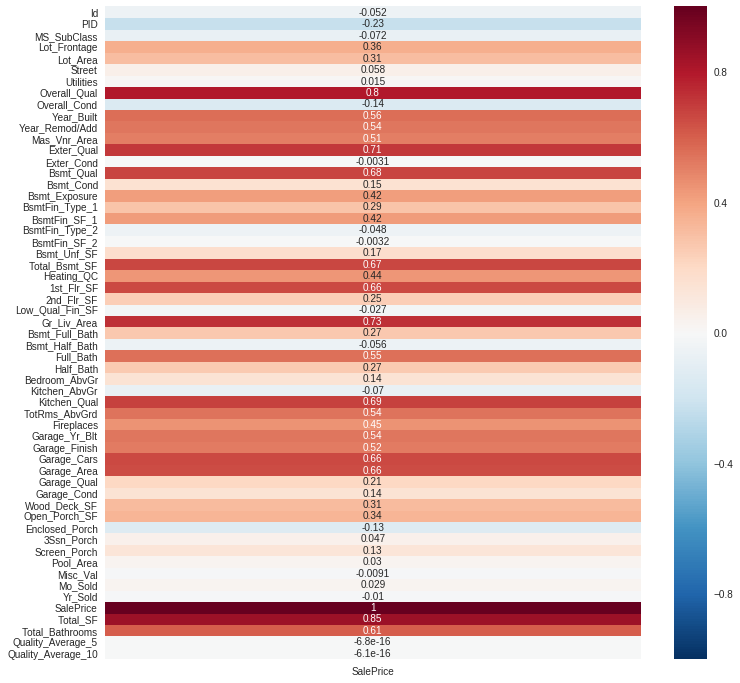

In [39]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(ames_data.corr()[['SalePrice']], annot=True)

# Still need to submit this one to Kaggle. HERE!!!!@!!!!!!!!!!!!


In [40]:
y = ames_data['SalePrice'] #put housing prices on a logarithmic scale.

features = ['Total_SF','Total_Bathrooms','Exter_Qual','TotRms_AbvGrd','Garage_Cars','Year_Remod/Add']

X = ames_data[features]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [41]:
def basic_features(df):
    return df[['Total_SF','Total_Bathrooms','Exter_Qual','TotRms_AbvGrd','Garage_Cars','Year_Remod/Add']]

# def string_cleaning(df):
#     for col in df:
#         return df[col].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1,'Av': 3, 'Mn': 2, 'No': 1,\
#                             'GLQ': 5, 'ALQ': 4, 'BLQ': 3, 'Rec': 4, 'LwQ': 2, 'Unf': 1, 'Typ': 5, 'Min1': 4,\
#                             'Min2': 4, 'Mod': 3, 'Maj1': 2, 'Maj2': 2, 'Sal': 0,'Fin': 3, 'RFn': 2, 'Unf': 1,\
#                             'AllPub': 1}).to_frame()

basic_features_tf = FunctionTransformer(basic_features, validate=False)
#string_cleaning_tf = FunctionTransformer(string_cleaning, validate = False)

In [42]:
union = FeatureUnion([("basic_features_tf", basic_features_tf), ('string_cleaning_tf', string_cleaning_tf)])

In [43]:
poly = PolynomialFeatures(include_bias=False)

imputer = Imputer()

ss = StandardScaler()

lasso = Lasso()

pipe = Pipeline([
    
    
    ('imputer', imputer),
    ('poly', poly),
    ('ss', ss),
    ('lasso', lasso)
]) 

params = {
    
    'imputer__strategy': ['mean', 'median', 'most_frequent'],
    'lasso__alpha': np.arange(.3, .4, .0005),
    'lasso__max_iter': [1500]
}

gs_lasso = GridSearchCV(pipe, param_grid=params)
gs_lasso.fit(X_train, y_train)
print(gs_lasso.best_score_)
gs_lasso.best_params_

0.852613560009


{'imputer__strategy': 'mean',
 'lasso__alpha': 0.40000000000000008,
 'lasso__max_iter': 1500}

This one got .862886978121

In [44]:
poly = PolynomialFeatures(include_bias=False)

imputer = Imputer()

ss = StandardScaler()

ridge = Ridge()

pipe = Pipeline([
    
    
    ('imputer', imputer),
    ('poly', poly),
    ('ss', ss),
    ('ridge', ridge)
]) 

params = {
    
    'imputer__strategy': ['mean', 'median', 'most_frequent'],
    'ridge__max_iter': [1500]
}

gs_ridge = GridSearchCV(pipe, param_grid=params)
gs_ridge.fit(X_train, y_train)
print(gs_ridge.best_score_)
gs_ridge.best_params_

0.856728692019


{'imputer__strategy': 'mean', 'ridge__max_iter': 1500}

In [45]:
poly = PolynomialFeatures(include_bias=False)

imputer = Imputer()

ss = StandardScaler()

enet = ElasticNet()

pipe = Pipeline([
    
    
    ('imputer', imputer),
    ('poly', poly),
    ('ss', ss),
    ('enet', enet)
]) 

params = {
    
    'imputer__strategy': ['mean', 'median', 'most_frequent']
    
}

gs_enet = GridSearchCV(pipe, param_grid=params)
gs_enet.fit(X_train, y_train)
print(gs_enet.best_score_)
gs_enet.best_params_

0.825422622459


{'imputer__strategy': 'mean'}

In [ ]:
gs.score(X_test, y_test)

In [ ]:
test = pd.read_csv('test.csv', index_col='Id')
test.columns = test.columns.map(lambda x: str(x.replace(' ', '_')))
test = test.drop(["Alley",'Fireplace_Qu','Pool_QC','Fence', 'Misc_Feature'], axis = 1)
test.head()

test['Total_SF'] = test['Gr_Liv_Area'] + test["Total_Bsmt_SF"] + test["Garage_Area"] + test['Wood_Deck_SF']\
    + test["Open_Porch_SF"] + test['Enclosed_Porch'] + test['3Ssn_Porch'] + test['Screen_Porch']\
    + test['Pool_Area']

test["Total_Bathrooms"] = test['Bsmt_Full_Bath'] + test['Bsmt_Half_Bath'] + test['Full_Bath'] + test['Half_Bath']
    
Xs_test.head(n=20)

In [ ]:
Xs_test.isnull().sum()

In [ ]:
Xs_test = test[features]

Xs_test.Exter_Qual.replace({'TA': 3, 'Gd': 4, 'Ex': 5, 'Fa': 2}, inplace=True)



In [ ]:
Xs_test.head()

In [ ]:
predictions = np.exp(gs.predict(Xs_test))

In [ ]:
test['SalePrice'] = predictions

test[['SalePrice']].to_csv('submission_19.csv', index=True)

# New one.

In [46]:
y = ames_data["SalePrice"]

features = ['Overall_Qual', 'Exter_Qual','Gr_Liv_Area','Kitchen_Qual','Bsmt_Qual',\
    'Garage_Cars','Garage_Area','1st_Flr_SF','Total_Bsmt_SF','Year_Built','Full_Bath']

X = ames_data[features]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [47]:
poly = PolynomialFeatures(include_bias=False)

imputer = Imputer()

ss = StandardScaler()

lasso = Lasso()

pipe = Pipeline([
    

    ('imputer', imputer),
    ('poly', poly),
    ('ss', ss),
    ('lasso', lasso)
]) 

params = {
    
    'imputer__strategy': ['mean', 'median', 'most_frequent'],
    'lasso__alpha': np.arange(.45, .5, .0005),
    'lasso__max_iter': [1100]
}

gs = GridSearchCV(pipe, param_grid=params)
lasso_gs = gs.fit(X_train, y_train)
print(gs.best_score_)
gs.best_params_

0.87600009431


{'imputer__strategy': 'mean',
 'lasso__alpha': 0.49950000000000006,
 'lasso__max_iter': 1100}

In [48]:
poly = PolynomialFeatures(include_bias=False)

imputer = Imputer()

ss = StandardScaler()

ridge = Ridge()

pipe = Pipeline([
    
    
    ('imputer', imputer),
    ('poly', poly),
    ('ss', ss),
    ('ridge', ridge)
]) 

params = {
    
    'imputer__strategy': ['mean', 'median', 'most_frequent']
    
}

gs = GridSearchCV(pipe, param_grid=params)
ridge_gs = gs.fit(X_train, y_train)
print(gs.best_score_)
gs.best_params_

0.879134259016


{'imputer__strategy': 'mean'}

In [49]:
poly = PolynomialFeatures(include_bias=False)

imputer = Imputer()

ss = StandardScaler()

enet = ElasticNet()

pipe = Pipeline([
    
    
    ('imputer', imputer),
    ('poly', poly),
    ('ss', ss),
    ('enet', enet)
]) 

params = {
    
    'imputer__strategy': ['mean', 'median', 'most_frequent'],
    
}

gs = GridSearchCV(pipe, param_grid=params)
enet_gs = gs.fit(X_train, y_train)
print(gs.best_score_)
gs.best_params_

0.869509759247


{'imputer__strategy': 'mean'}

In [ ]:
test = pd.read_csv('test.csv', index_col='Id')
test.columns = test.columns.map(lambda x: str(x.replace(' ', '_')))
test = test.drop(["Alley",'Fireplace_Qu','Pool_QC','Fence', 'Misc_Feature'], axis = 1)


In [ ]:
Xs_test = test[features]
Xs_test.head()

In [ ]:
Xs_test.Bsmt_Qual.value_counts()

In [ ]:
def string_cleaning(df):
    return df.replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1,'Av': 3, 'Mn': 2, 'No': 1,\
                            'GLQ': 5, 'ALQ': 4, 'BLQ': 3, 'Rec': 4, 'LwQ': 2, 'Unf': 1, 'Typ': 5, 'Min1': 4,\
                            'Min2': 4, 'Mod': 3, 'Maj1': 2, 'Maj2': 2, 'Sal': 0,'Fin': 3, 'RFn': 2, 'Unf': 1,\
                            'AllPub': 1, 'Pave': 1, 'Grvl': 0, 'AllPub': 4, 'NoSewr':3, 'NoSeWa':2, "ELO":1 }, inplace=True)
string_cleaning(Xs_test)

In [ ]:
Xs_test.isnull().sum()

In [ ]:
mode_basement = Xs_test.Bsmt_Qual.mode()
mode_basement
Xs_test['Bsmt_Qual'] = Xs_test['Bsmt_Qual'].fillna(3)

In [ ]:
Xs_test.isnull().sum()

In [ ]:
predictions = ridge_gs.predict(Xs_test)

In [ ]:

test['SalePrice'] = predictions



test[['SalePrice']].to_csv('submission_12.csv', index=True)

Alright lets make a function that can do some of the data cleaning like getting rid of strings, to be included in your pipeline.


Function to clean white space. 


In [ ]:
def no_spaces(df):
    return df.columns.map(lambda x: str(x.replace(' ', '_')))

# New Gridsearch / Pipeline off engineered columns only.


In [50]:
y = ames_data['SalePrice']

features = ['Total_SF','Total_Bathrooms','Overall_Qual', 'Exter_Qual', 'Kitchen_Qual', 'Garage_Cars', 'Bsmt_Qual']

X = ames_data[features]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [51]:
poly = PolynomialFeatures(include_bias=False)

imputer = Imputer()

ss = StandardScaler()

lasso = Lasso()

pipe = Pipeline([
    

    ('imputer', imputer),
    ('poly', poly),
    ('ss', ss),
    ('lasso', lasso)
]) 

params = {
    
    'imputer__strategy': ['mean', 'median', 'most_frequent'],
    'lasso__alpha': np.arange(.1, .5, .0005),
    'lasso__max_iter': [1500]
}

gs = GridSearchCV(pipe, param_grid=params)
lasso_gs = gs.fit(X_train, y_train)
print(gs.best_score_)
gs.best_params_

0.884917094426


{'imputer__strategy': 'mean',
 'lasso__alpha': 0.49950000000000039,
 'lasso__max_iter': 1500}

In [54]:
#####This is a good one! need to submit


poly = PolynomialFeatures(include_bias=False)

imputer = Imputer()

ss = StandardScaler()

ridge = Ridge()

pipe = Pipeline([
    
    
    ('imputer', imputer),
    ('poly', poly),
    ('ss', ss),
    ('ridge', ridge)
]) 

params = {
    
    'imputer__strategy': ['mean', 'median', 'most_frequent'],
    'ridge__alpha': np.logspace(1,11,1),
    'ridge__max_iter': [1500,2000]
}

gs = GridSearchCV(pipe, param_grid=params)
ridge_gs = gs.fit(X_train, y_train)
print(gs.best_score_)
gs.best_params_

0.886177499302


{'imputer__strategy': 'mean', 'ridge__alpha': 10.0, 'ridge__max_iter': 1500}

In [53]:
poly = PolynomialFeatures(include_bias=False)

imputer = Imputer()

ss = StandardScaler()

enet = ElasticNet()

pipe = Pipeline([
    
    
    ('imputer', imputer),
    ('poly', poly),
    ('ss', ss),
    ('enet', enet)
]) 

params = {
    
    'imputer__strategy': ['mean', 'median', 'most_frequent'],
    
}

gs = GridSearchCV(pipe, param_grid=params)
enet_gs = gs.fit(X_train, y_train)
print(gs.best_score_)
gs.best_params_

0.86809294757


{'imputer__strategy': 'mean'}

In [111]:
test = pd.read_csv('test.csv', index_col='Id')
test.columns = test.columns.map(lambda x: str(x.replace(' ', '_')))
test = test.drop(["Alley",'Fireplace_Qu','Pool_QC','Fence', 'Misc_Feature'], axis = 1)
test.head()

test['Total_SF'] = test['Gr_Liv_Area'] + test["Total_Bsmt_SF"] + test["Garage_Area"] + test['Wood_Deck_SF']\
    + test["Open_Porch_SF"] + test['Enclosed_Porch'] + test['3Ssn_Porch'] + test['Screen_Porch']\
    + test['Pool_Area']

test["Total_Bathrooms"] = test['Bsmt_Full_Bath'] + test['Bsmt_Half_Bath'] + test['Full_Bath'] + test['Half_Bath']

In [112]:
Xs_test = test[features]

Xs_test.head()

def string_cleaning(df):
    return df.replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1,'Av': 3, 'Mn': 2, 'No': 1,\
                            'GLQ': 5, 'ALQ': 4, 'BLQ': 3, 'Rec': 4, 'LwQ': 2, 'Unf': 1, 'Typ': 5, 'Min1': 4,\
                            'Min2': 4, 'Mod': 3, 'Maj1': 2, 'Maj2': 2, 'Sal': 0,'Fin': 3, 'RFn': 2, 'Unf': 1,\
                            'AllPub': 1, 'Pave': 1, 'Grvl': 0, 'AllPub': 4, 'NoSewr':3, 'NoSeWa':2, "ELO":1 }, inplace=True)
string_cleaning(Xs_test)

In [113]:
mode_basement = Xs_test.Bsmt_Qual.mode()
mode_basement
Xs_test['Bsmt_Qual'] = Xs_test['Bsmt_Qual'].fillna(3)

In [117]:
predictions = np.exp(lasso_gs.predict(Xs_test))

In [118]:
test['SalePrice'] = predictions

test[['SalePrice']].to_csv('submission_24.csv', index=True)

In [ ]:
y = ames_data['SalePrice']

features = ['Total_SF','Total_Bathrooms','Overall_Qual', 'TotRms_AbvGrd', 'Kitchen_Qual', 'Garage_Cars', 'Sale_Condition  ']

X = ames_data[features]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [ ]:
poly = PolynomialFeatures(include_bias=False)

imputer = Imputer()

ss = StandardScaler()

lasso = Lasso()

pipe = Pipeline([
    

    ('imputer', imputer),
    ('poly', poly),
    ('ss', ss),
    ('lasso', lasso)
]) 

params = {
    
    'imputer__strategy': ['mean', 'median', 'most_frequent'],
    'lasso__alpha': np.arange(.1, .5, .0005),
    'lasso__max_iter': [1500]
}

gs = GridSearchCV(pipe, param_grid=params)
lasso_gs = gs.fit(X_train, y_train)
print(gs.best_score_)
gs.best_params_

In [ ]:
poly = PolynomialFeatures(include_bias=False)

imputer = Imputer()

ss = StandardScaler()

ridge = Ridge()

pipe = Pipeline([
    
    
    ('imputer', imputer),
    ('poly', poly),
    ('ss', ss),
    ('ridge', ridge)
]) 

params = {
    
    'imputer__strategy': ['mean', 'median', 'most_frequent'],
    'ridge__alpha': np.logspace(1,11,1),
    'ridge__max_iter': [1500,2000]
}

gs = GridSearchCV(pipe, param_grid=params)
ridge_gs = gs.fit(X_train, y_train)
print(gs.best_score_)
gs.best_params_

In [ ]:
poly = PolynomialFeatures(include_bias=False)

imputer = Imputer()

ss = StandardScaler()

enet = ElasticNet()

pipe = Pipeline([
    
    
    ('imputer', imputer),
    ('poly', poly),
    ('ss', ss),
    ('enet', enet)
]) 

params = {
    
    'imputer__strategy': ['mean', 'median', 'most_frequent'],
    
}

gs = GridSearchCV(pipe, param_grid=params)
enet_gs = gs.fit(X_train, y_train)
print(gs.best_score_)
gs.best_params_